In [4]:
from pathlib import Path as pt
import umap
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from typing import List
import warnings
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# from tqdm.notebook import tqdm as tqdm_notebook

warnings.filterwarnings('ignore')
tqdm.pandas()

In [29]:
from load_data import embedded_vectors_dir, names, titles, plots_dir, property_units, property_names
names, plots_dir

(['tmpC_topelements',
  'tbp_topelements',
  'vp_kPa_25C_topelements',
  'Pc_MPa',
  'Tc_K'],
 PosixPath('/Users/aravindhnivas/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/ML-properties/plots'))

In [40]:
def static_fig(umap_df: pd.DataFrame, title_name: str, short_title_name: str):
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

    # Create the scatter plot using seaborn
    scatter = sns.scatterplot(
        data=umap_df,
        x="UMAP1",
        y="UMAP2",
        hue="y",
        palette="viridis",
        ax=ax,
        s=50,
        alpha=0.6,
    )

    # Remove the automatic legend
    scatter.legend_.remove()

    # Create and customize the colorbar
    norm = plt.Normalize(umap_df["y"].min(), umap_df["y"].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    colorbar = fig.colorbar(sm, ax=ax)
    colorbar.set_label(title_name, fontsize=12)

    ax.set_xlabel("UMAP1", fontsize=12)
    ax.set_ylabel("UMAP2", fontsize=12)
    ax.set_title(short_title_name, fontsize=16)
    
    plt.tight_layout()
    # plt.show()
    return fig, ax

BP


<Figure size 640x480 with 0 Axes>

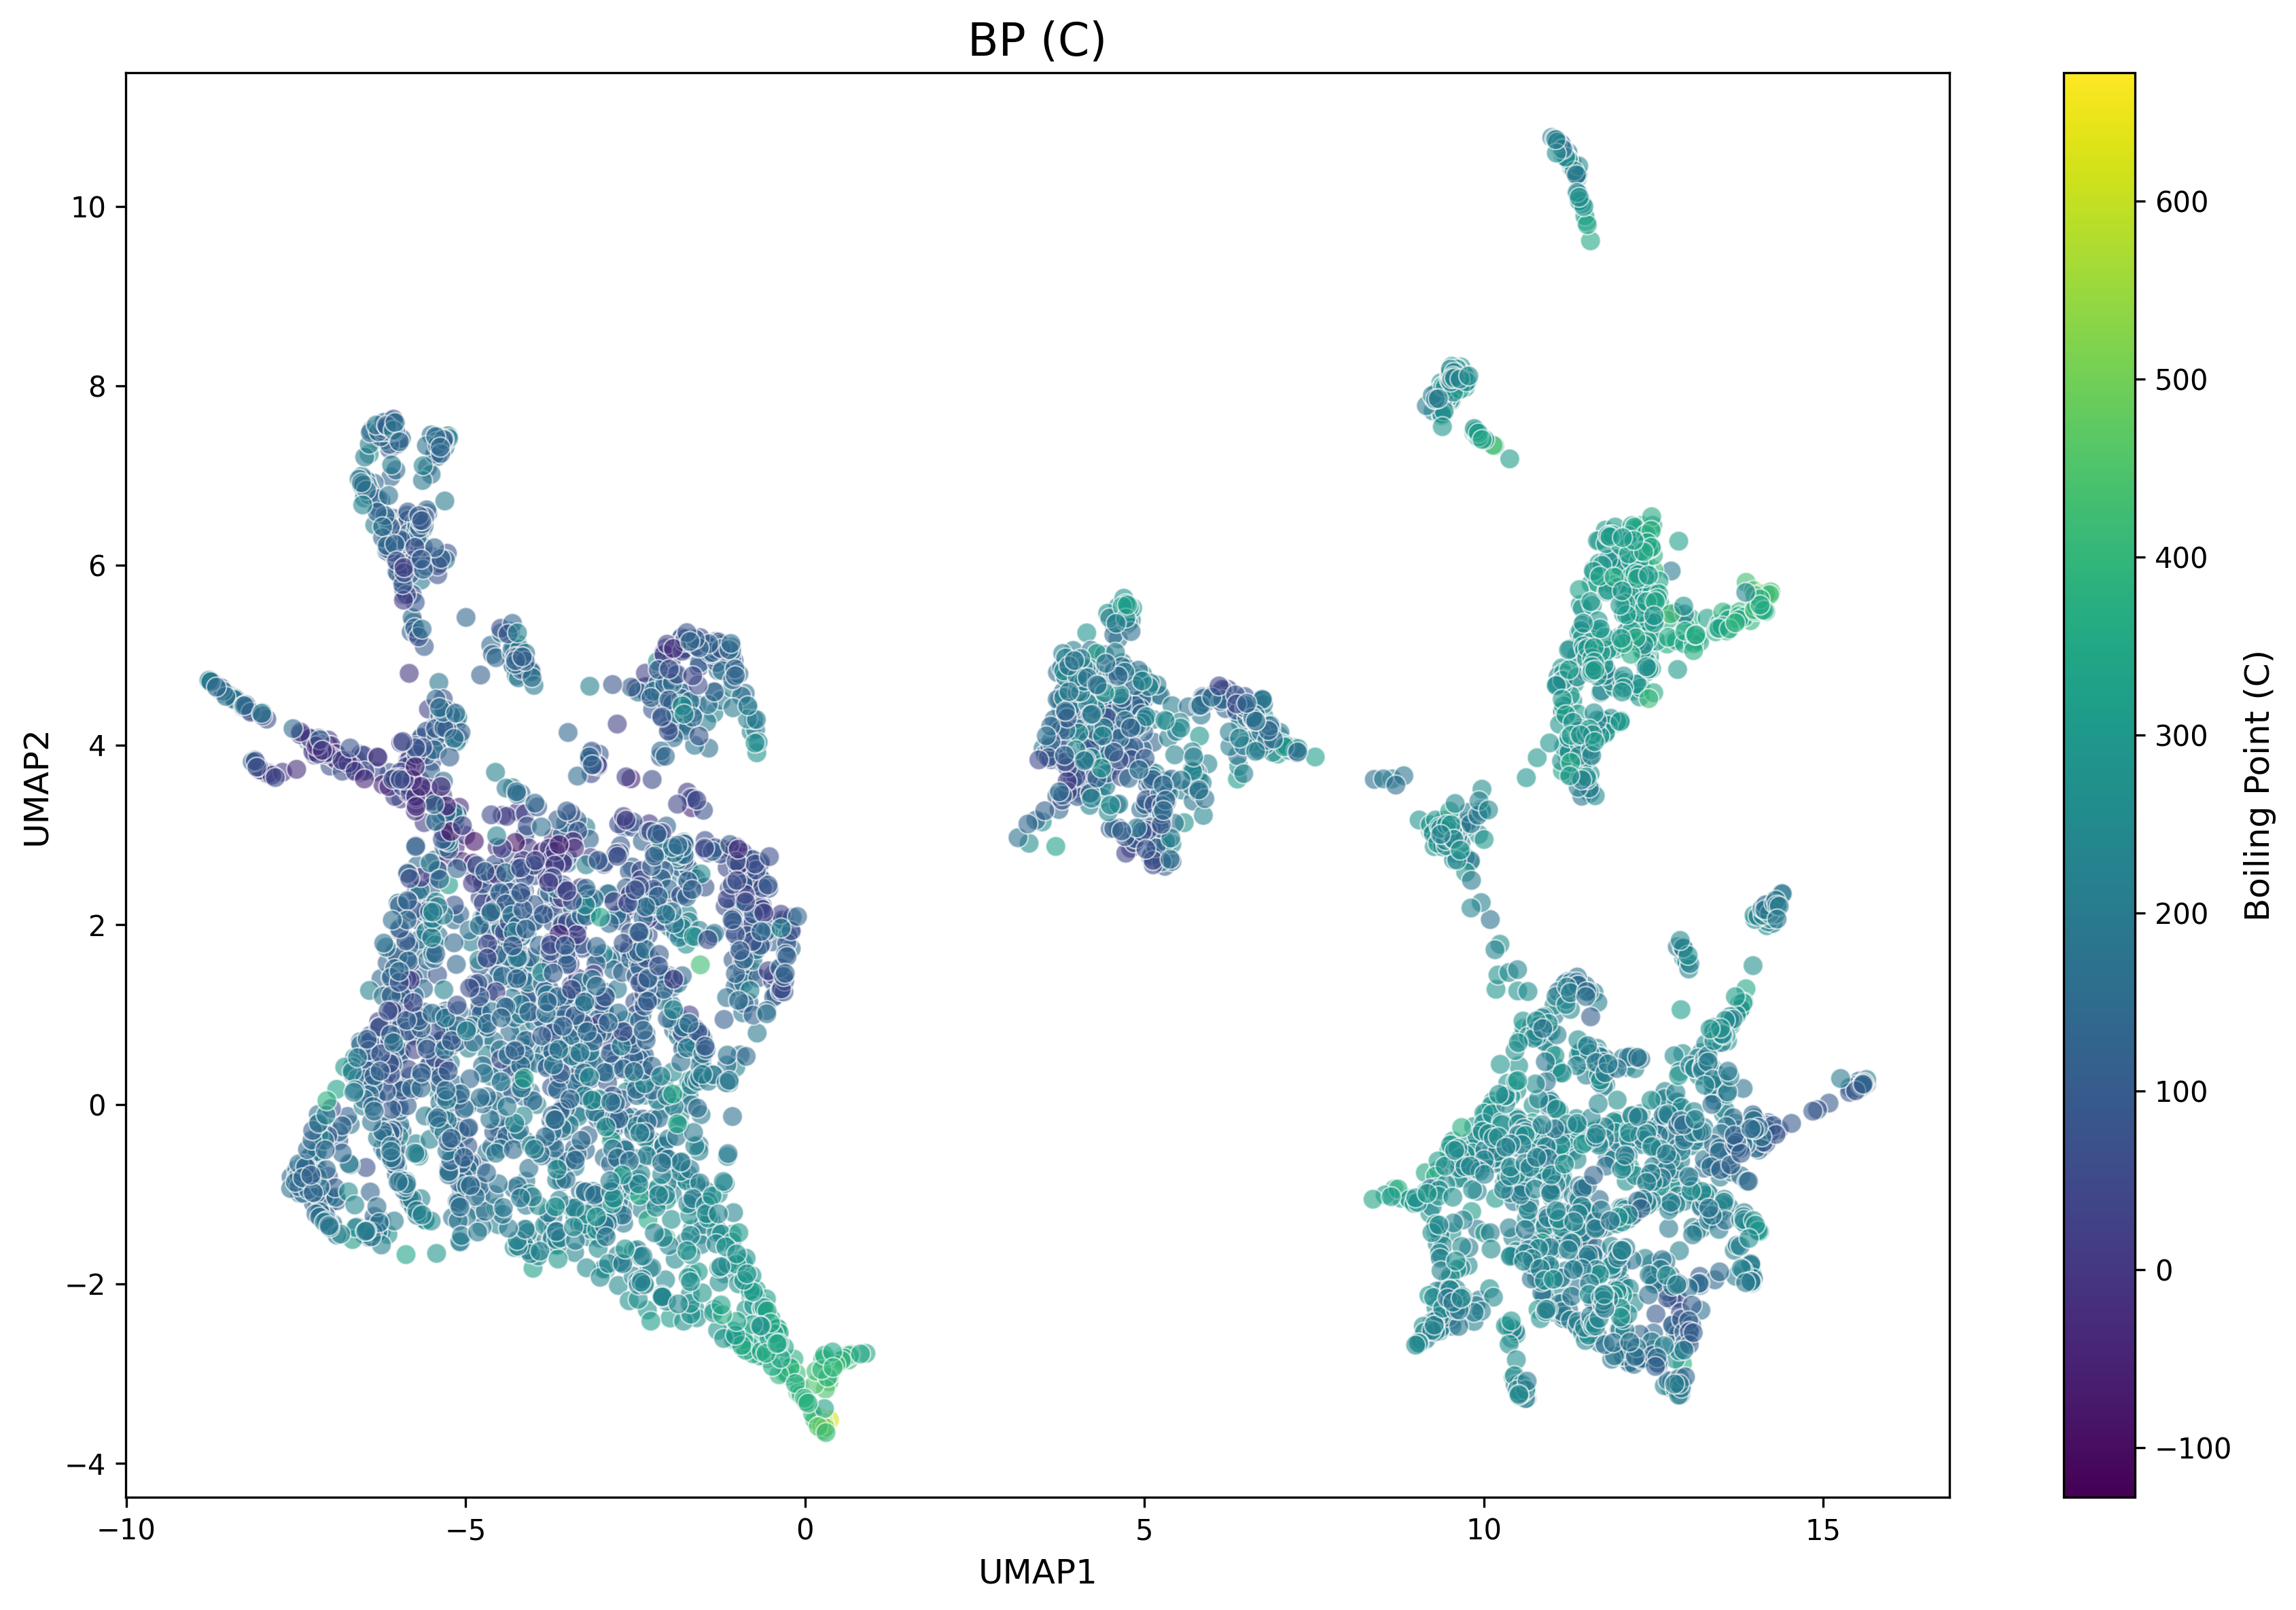

In [41]:
ind = 1
print(titles[ind])
umap_df = pd.read_parquet(
    embedded_vectors_dir[ind] / f'processed_mol2vec_embeddings/umap/cleaned_label_issues_xgboost/[umap_df]_{names[ind]}_scaled_random_state_42_umap_25_0.3_2_cluster_eps_0.7_min_samples_15.parquet'
)
# print(umap_df['Cluster'].unique(), umap_df['Cluster'].value_counts())
# display(umap_df)
title_name = f'{property_names[ind]} ({property_units[ind]})'
short_title_name = f'{titles[ind]} ({property_units[ind]})'
fig, ax = static_fig(umap_df, title_name, short_title_name)
# fig.savefig(plots_dir / f'{names[ind]}_umap.png')
plt.show()

In [ ]:
for ind in range(0, len(embedded_vectors_dir)):
    umap_df = pd.read_parquet(
        embedded_vectors_dir[ind] / f'processed_mol2vec_embeddings/umap/cleaned_label_issues_xgboost/[umap_df]_{names[ind]}_scaled_random_state_42_umap_25_0.3_2_cluster_eps_0.7_min_samples_15.parquet'
    )
    # print(umap_df['Cluster'].unique(), umap_df['Cluster'].value_counts())
    # display(umap_df)

    title_name = f'{property_names[ind]} ({property_units[ind]})'
    short_title_name = f'{titles[ind]} ({property_units[ind]})'
    fig, ax = static_fig(umap_df, title_name, short_title_name)
    fig.savefig(plots_dir / f'{names[ind]}_umap.png')
    # plt.show()
    plt.close(fig)
    print(f'{names[ind]} done')

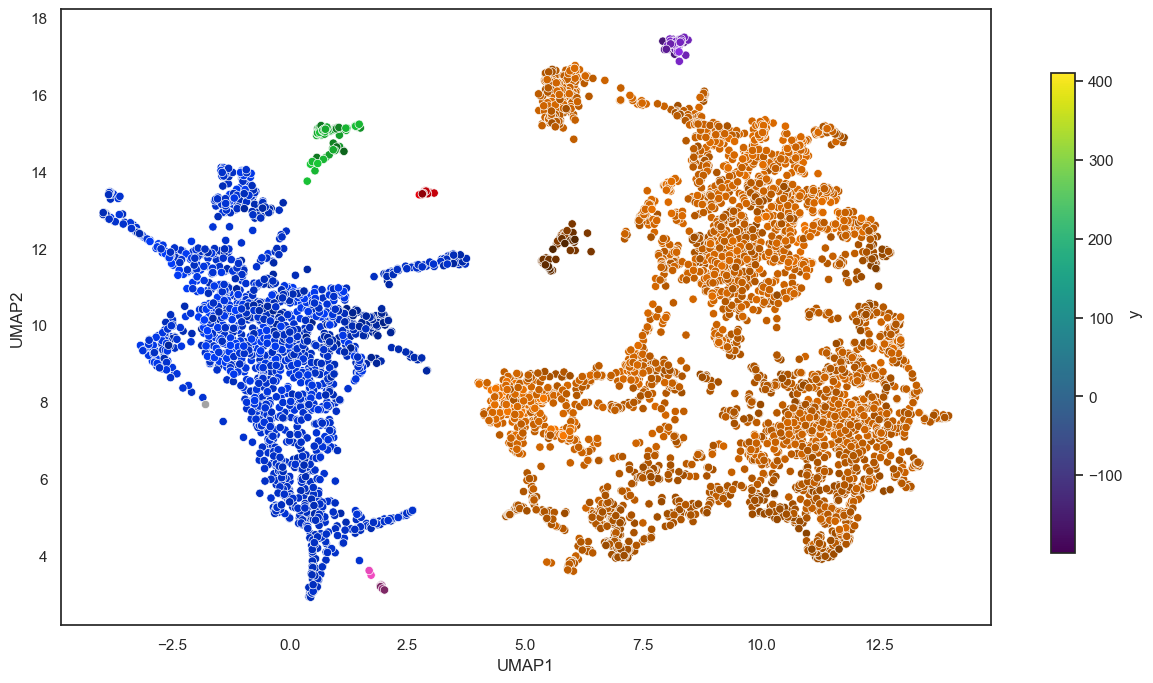

In [24]:
# plot UMAP using seaborn
# palette = sns.color_palette("bright", len(umap_df['Cluster'].unique()))
# sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', legend='full', palette=palette, data=umap_df)

cluster_cmaps = {}
for cluster_id in umap_df['Cluster'].unique():
    # Generate a colormap based on the cluster's assigned color
    base_color = sns.color_palette("bright", len(umap_df['Cluster'].unique()))[cluster_id]
    cluster_cmaps[cluster_id] = mcolors.LinearSegmentedColormap.from_list(
        f"cluster_{cluster_id}_cmap", [base_color, tuple(0.5 * c for c in base_color)]
    )

# Create the scatter plot with individual colormaps for each cluster
plt.figure(figsize=(12, 8))
for cluster_id, cmap in cluster_cmaps.items():
    cluster_data = umap_df[umap_df['Cluster'] == cluster_id]
    sns.scatterplot(
        x='UMAP1',
        y='UMAP2',
        hue='y',
        palette=cmap,
        data=cluster_data,
        legend=False,
    )
    
# Create the colorbar
# Get the current axes
ax = plt.gca()

# Create a new axes for the colorbar
cax = plt.axes([0.95, 0.2, 0.02, 0.6])  # Adjust position and size as needed

# Create a colorbar based on the 'y' property
vmin = umap_df['y'].min()
vmax = umap_df['y'].max()
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])  # This line is necessary for the colorbar to work properly
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('y')

plt.show()
